In [40]:
data=  pd.read_csv("./student-mat.csv")
data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0    course   mother           2          2         0       yes     no   no   
1    course   father           1          2         0        no    yes   no   
2     other   mother           1          2         3       yes     no  yes   
3      home   mother           1          3         0        no    yes  yes   
4      home   father           1          2         0        no    yes  yes   
..      ...      ...         ...        ...       ...       ...    ...  ...   
390  course    other           1          2         2        no    yes  yes   
391  course   mother           2          1         0        no     no   no   
392  course    other           1          1         3        no     no   no   
393  course   mother           3          1         0        no     no   no   
394  course   father           1          1         0        no     no   no   

    activities nursery higher internet romantic  famrel  freetime  goout  \
0           no     yes    yes       no       no       4         3      4   
1           no      no    yes      yes       no       5         3      3   
2           no     yes    yes      yes       no       4         3      2   
3          yes     yes    yes      yes      yes       3         2      2   
4           no     yes    yes       no       no       4         3      2   
..         ...     ...    ...      ...      ...     ...       ...    ...   
390         no     yes    yes       no       no       5         5      4   
391         no      no    yes      yes       no       2         4      5   
392         no      no    yes       no       no       5         5      3   
393         no      no    yes      yes       no       4         4      1   
394         no     yes    yes      yes       no       3         2      3   

     Dalc  Walc  health  absences  G1  G2  G3  
0       1     1       3         6   5   6   6  
1       1     1       3         4   5   5   6  
2       2     3       3        10   7   8  10  
3       1     1       5         2  15  14  15  
4       1     2       5         4   6  10  10  
..    ...   ...     ...       ...  ..  ..  ..  
390     4     5       4        11   9   9   9  
391     3     4       2         3  14  16  16  
392     3     3       3         3  10   8   7  
393     3     4       5         0  11  12  10  
394     3     3       5         5   8   9   9  

[395 rows x 33 columns]

In [41]:
train = data.sample(frac=.7, ignore_index=True, random_state=42)
test = data.sample(frac=.3, ignore_index=True, random_state=42)

In [42]:
target= test['G3']

In [43]:
test.drop(['G3'],1,inplace=True)

---

In [44]:
cat_cols=train.select_dtypes(include='object').columns.tolist()
num_cols=train.select_dtypes(exclude='object').columns.tolist()

In [45]:
X = train.drop(['G3'],1)
y = train.G3

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state=42)

In [47]:
#encoding

le = LabelEncoder()
for _ in cat_cols:
    X_train[_]=le.fit_transform(X_train[_])
    X_test[_]=le.transform(X_test[_])
    test[_] = le.transform(test[_])

In [48]:
#tree model

from xgboost import XGBRegressor
reg = XGBRegressor(random_state=42)
reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
mean_squared_error(reg.predict(X_test),y_test)

4.334973269815632

In [56]:
mean_squared_error(reg.predict(test), target)

2.223812951132389

# Ensemble

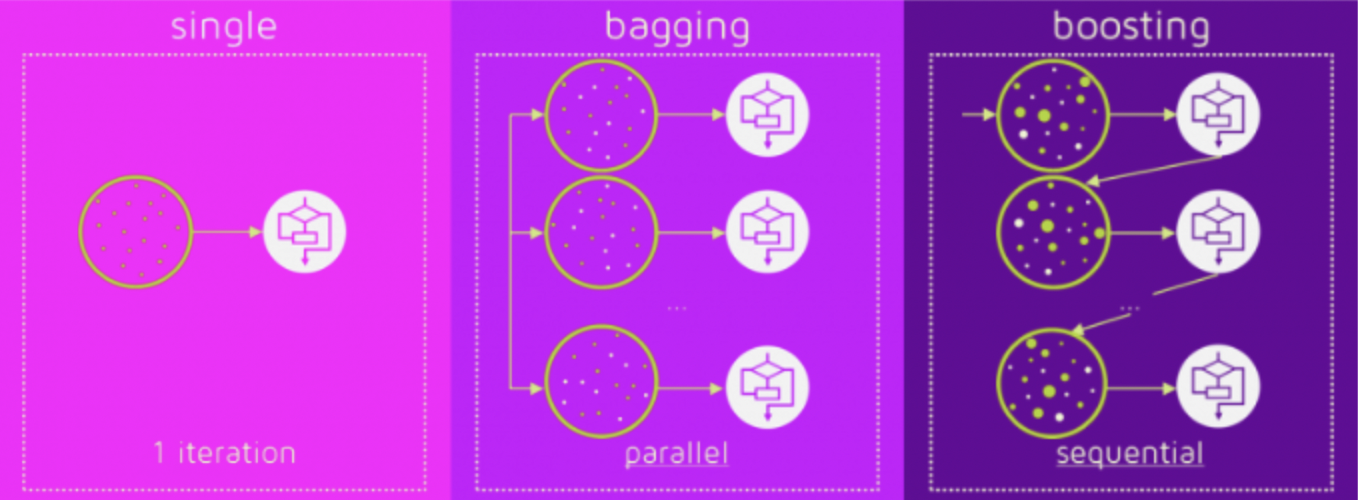

* single : 단일 모델
* bagging : 부트스트랩을 이용
* boosting : 트리를 생성하면서 이전의 트리로부터 개선된 방향으로 업데이트

## Bagging

**부트스트랩**

데이터에서 중복을 허용하여 확률표본추출을 진행하여 새로운 훈련 데이터를 만들어내는 것을 의미한다.  대표적으로 RandomForest가 있음.

*중복을 허용하지 않으면 Pasting 이라고 한다.*

## Boosting

Boosting은 반복적으로 모델을 업데이트한다. 이전의 트리에서 결과가 어떻게 나오는지에 따라 데이터셋 샘플에 대한 가중치를 부여한다.  

결과적으로 반복할 때마다 각 샘플의 중요도에 따라서 다른 분류기가 만들어지는 것이고  최종적으로는 모든 반복 생성된 모델의 결과를 **voting** 한다.

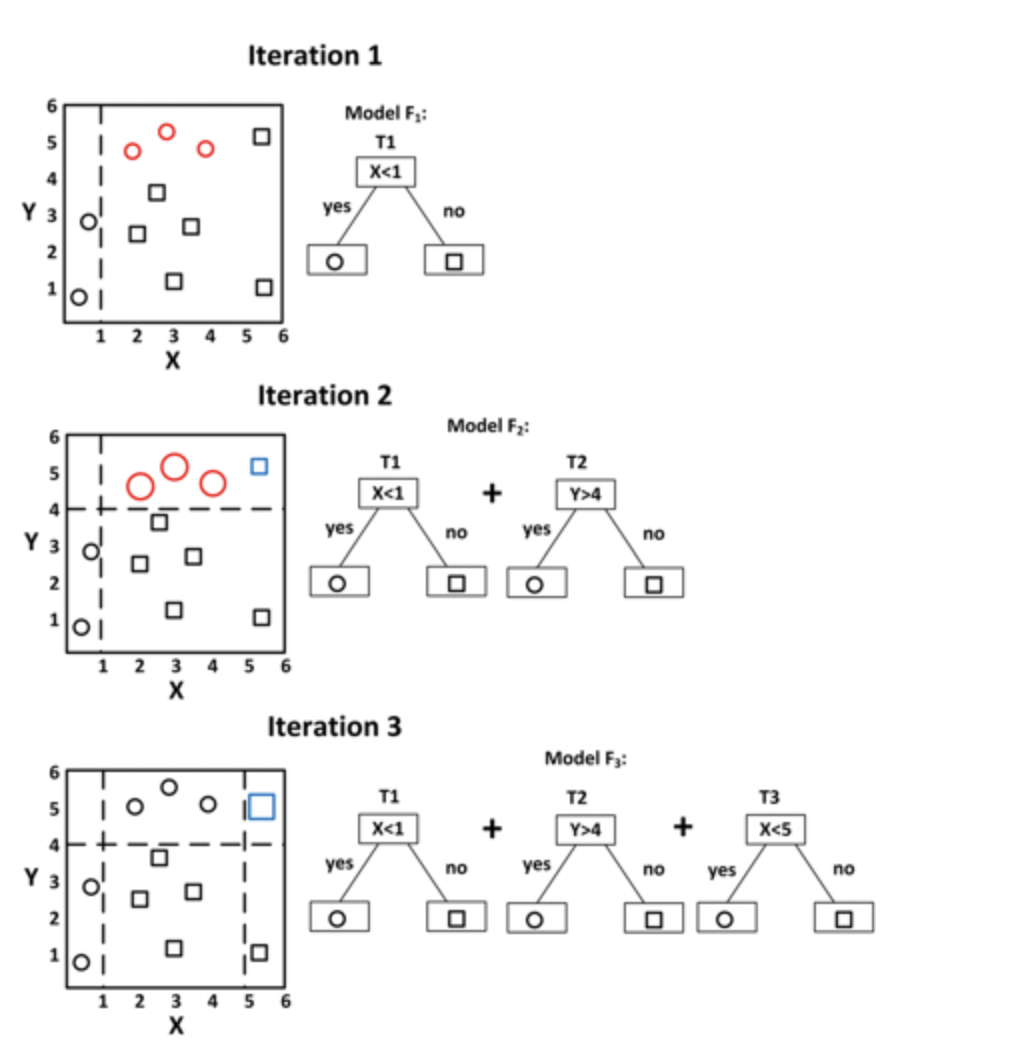

빨간 원이 분류가 잘 되지 않아서 다음 반복에서 가중치를 높여 새 트리와 합성하여 생성한다. 두번 째에서 파랑이 분류가 되지 않았는데 이에 대한 가중치를 높이고 새 트리와 합성하여 반복한다.

부스팅은 2가지로 나뉜다.

* AdaBoost(AdaptiveBoost[https://tyami.github.io/machine%20learning/ensemble-3-boosting-AdaBoost/]
* Gradient Boosting Model (GBM)

## stacking

기존 방식은 개별 모델이 예측하고 평가지표를 활용해서 비교하는데,<br>   stacking은 
**개별 모델이 예측한 prediction을 다시 training set으로 사용해서 학습**

* 단일 모델들 (여러개)
* 최종모델 (하나)

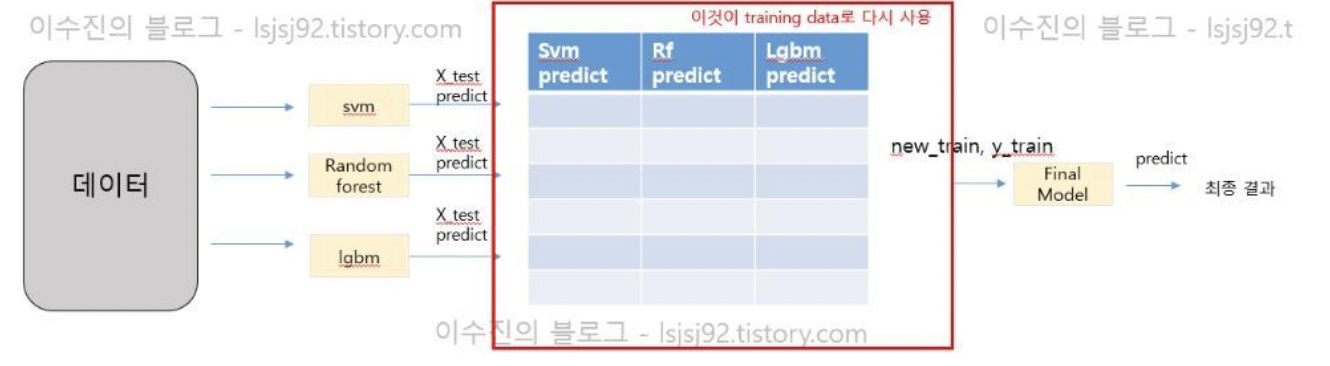

이러한 기본 stacking 방식은 과적합의 문제점이 있어서 사용하지 않고 cv기반의 KFold를 사용

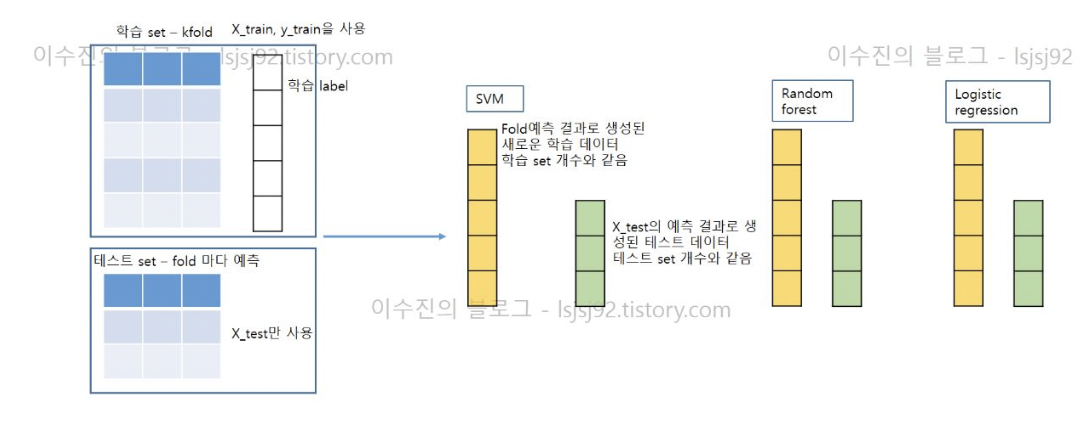

# Voting

최종 모델의 예측값을 결정짓는 2가지
* Hard Voting
* Soft Voting

## Hard Voting
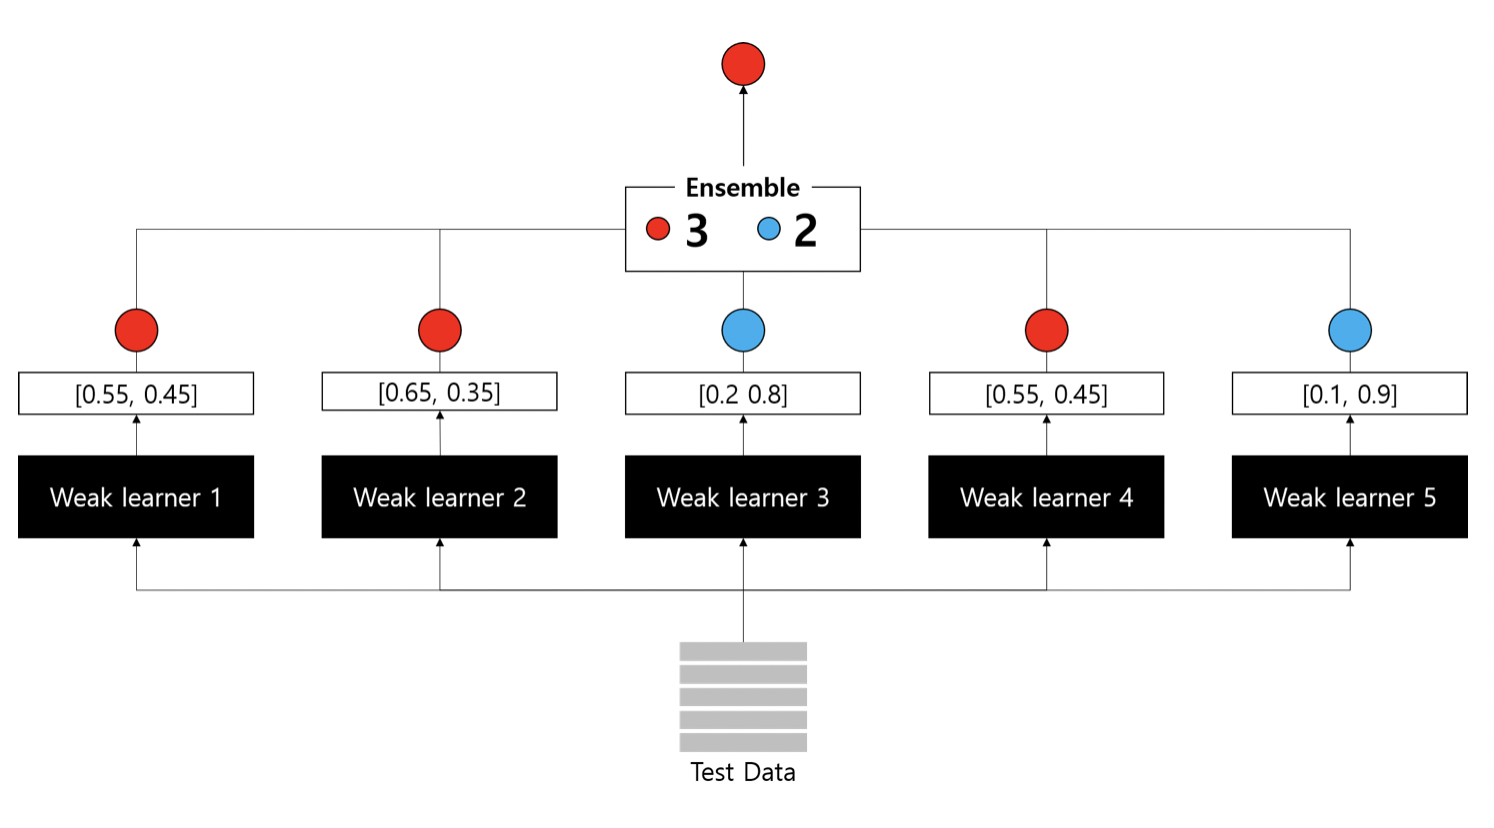
source : tyami

각 모델들은 클래스별 예측 확률을 제시하게 되는데, 다수결로 최종 예측값을 결정한다.

## Soft Voting

단일 모델들의 예측 확률값의 평균이나 가중치 합으로 사용한다.

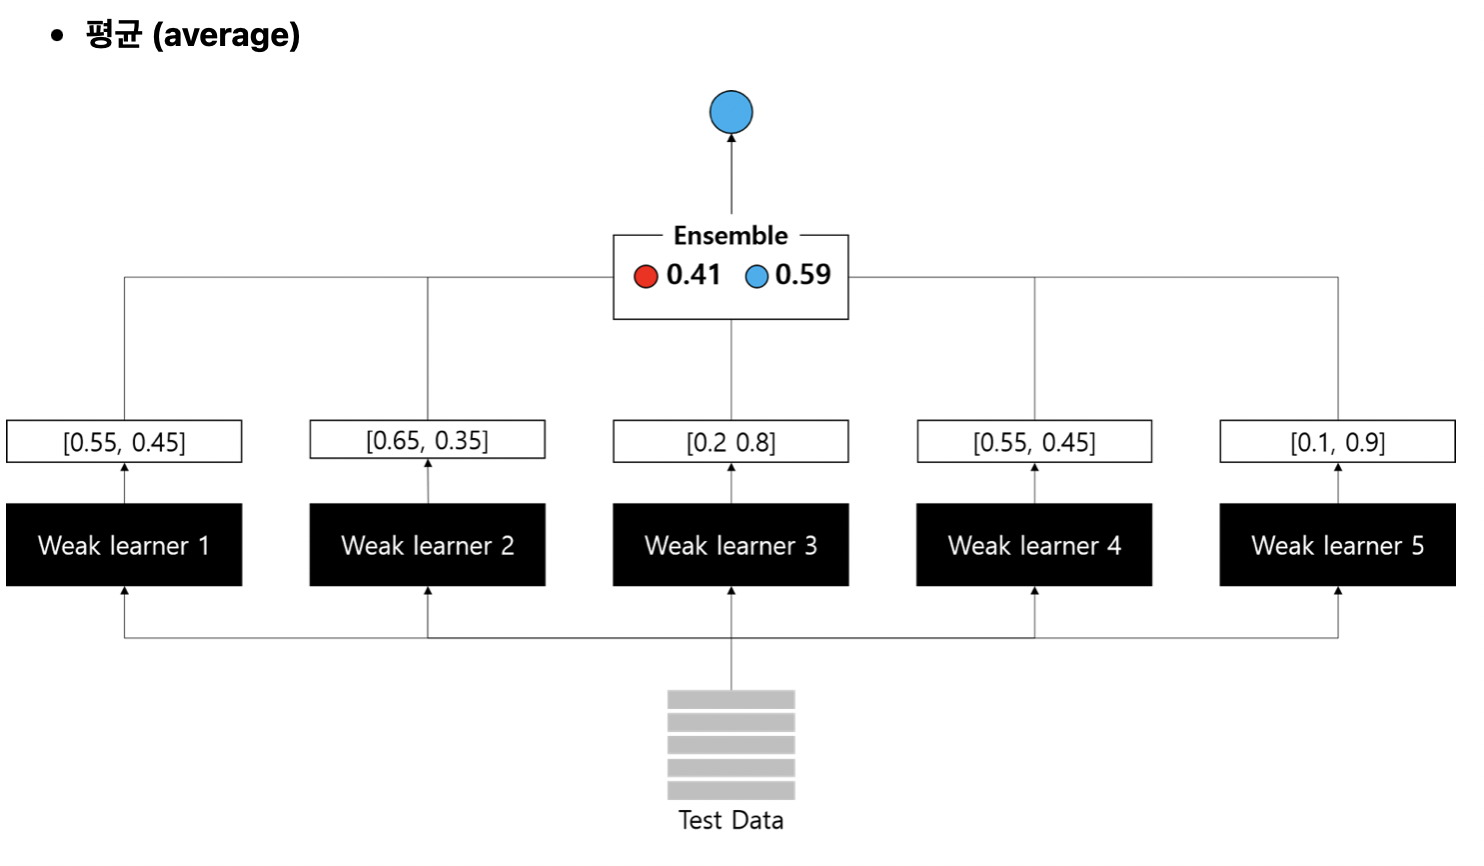
source:tyami

각 클래스별 예측한 확률값들을 평균으로 하여 결정한다.

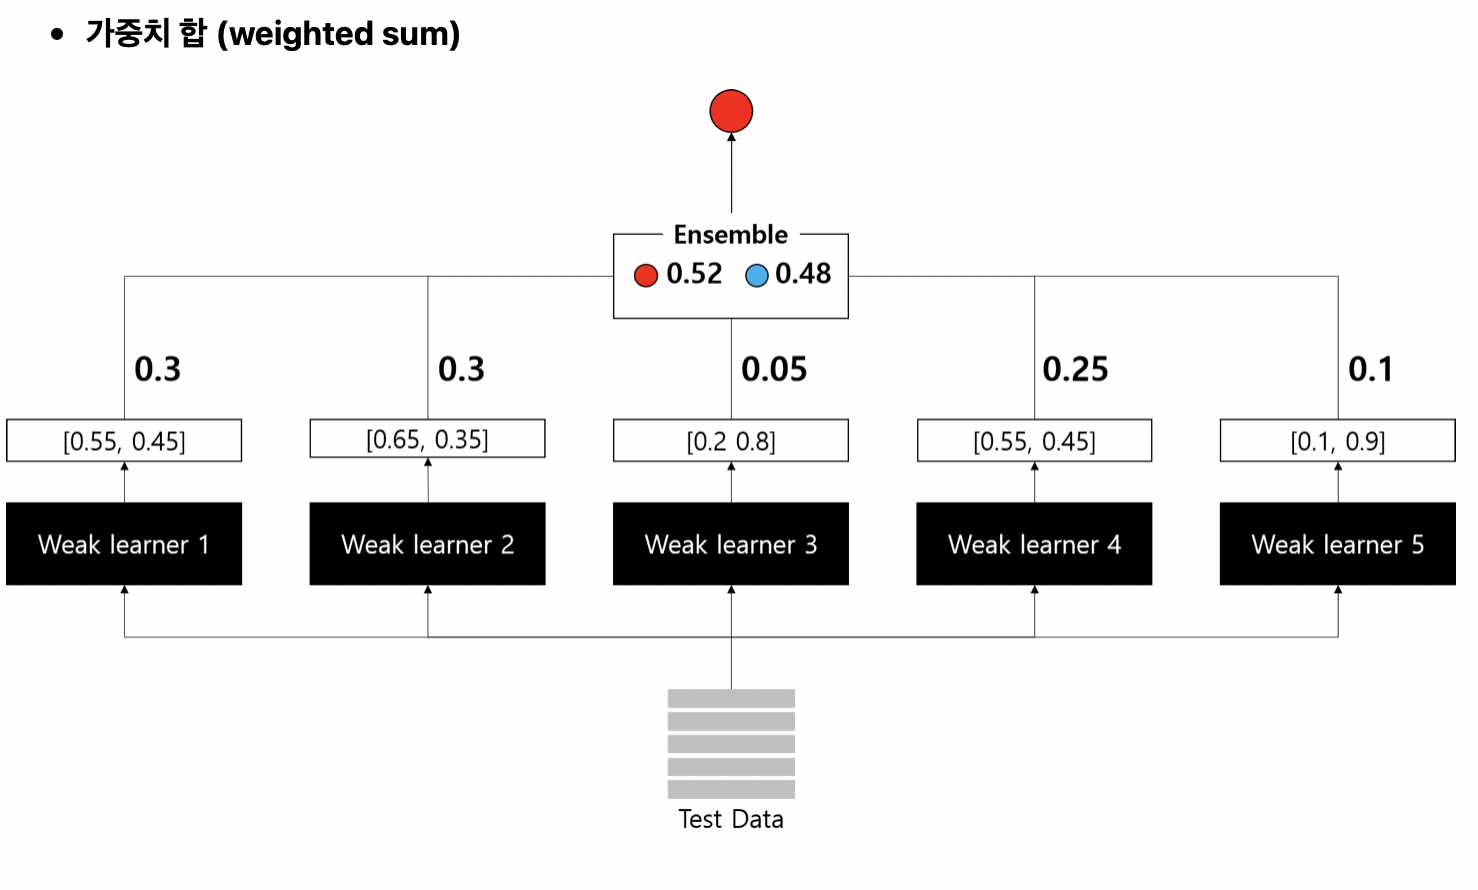
source:ttyami

단일 모델들의 신뢰도가 다른 경우에 가중치를 부여해서 확률값의 가중치 합을 사용할 수 있다.  
가중치는 임의로 부여할 수도 있고, 스태킹 기법을 사용할 수 있다.

In [95]:
from vecstack import stacking

models = [
    LGBMRegressor(random_state = 0, n_jobs = -1, 
        n_estimators = 100, max_depth = 3),
        
    RandomForestRegressor(random_state = 0, n_jobs = -1, 
        n_estimators = 100, max_depth = 3),
        
    CatBoostRegressor(random_state=42,verbose=False)]
    
S_train, S_test = stacking(models, X_train,y_train,X_test,
                          regression=True, metric = mean_squared_error,
                          n_folds=5, stratified=False, shuffle =True,
                          random_state=42, verbose=2)

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LGBMRegressor]
    fold  0:  [5.94930486]
    fold  1:  [2.36842362]
    fold  2:  [2.85335467]
    fold  3:  [3.04412801]
    fold  4:  [1.54722021]
    ----
    MEAN:     [3.15248627] + [1.49097611]
    FULL:     [3.16136516]

model  1:     [RandomForestRegressor]
    fold  0:  [6.13593601]
    fold  1:  [1.80799418]
    fold  2:  [2.27147546]
    fold  3:  [2.15224976]
    fold  4:  [1.32159613]
    ----
    MEAN:     [2.73785031] + [1.73077025]
    FULL:     [2.74822261]

model  2:     [CatBoostRegressor]
    fold  0:  [7.30569543]
    fold  1:  [1.37958793]
    fold  2:  [1.49954698]
    fold  3:  [3.59060453]
    fold  4:  [2.79265706]
    ----
    MEAN:     [3.31361839] + [2.15945040]
    FULL:     [3.31488251]



In [96]:
model = CatBoostRegressor(random_state=42)
model.fit(S_train,y_train)

y_pred = model.predict(S_test)

print(f'Final prediction score : {mean_squared_error(y_test,y_pred)}')

Learning rate set to 0.029123
0:	learn: 4.4348312	total: 2.1ms	remaining: 2.1s
1:	learn: 4.3411917	total: 3.43ms	remaining: 1.71s
2:	learn: 4.2522566	total: 4.6ms	remaining: 1.53s
3:	learn: 4.1678152	total: 5.78ms	remaining: 1.44s
4:	learn: 4.0812103	total: 6.97ms	remaining: 1.39s
5:	learn: 4.0010139	total: 8.4ms	remaining: 1.39s
6:	learn: 3.9241308	total: 9.63ms	remaining: 1.36s
7:	learn: 3.8493646	total: 10.6ms	remaining: 1.32s
8:	learn: 3.7714450	total: 11.6ms	remaining: 1.27s
9:	learn: 3.6951305	total: 12.6ms	remaining: 1.25s
10:	learn: 3.6250075	total: 13.5ms	remaining: 1.22s
11:	learn: 3.5513734	total: 14.8ms	remaining: 1.22s
12:	learn: 3.4808992	total: 15.8ms	remaining: 1.2s
13:	learn: 3.4131766	total: 16.8ms	remaining: 1.18s
14:	learn: 3.3511970	total: 17.6ms	remaining: 1.16s
15:	learn: 3.2875133	total: 18.9ms	remaining: 1.16s
16:	learn: 3.2254167	total: 20ms	remaining: 1.15s
17:	learn: 3.1706564	total: 21.1ms	remaining: 1.15s
18:	learn: 3.1128026	total: 22.3ms	remaining: 1.15s

274:	learn: 0.9941096	total: 182ms	remaining: 481ms
275:	learn: 0.9917705	total: 183ms	remaining: 480ms
276:	learn: 0.9900439	total: 184ms	remaining: 479ms
277:	learn: 0.9898710	total: 184ms	remaining: 478ms
278:	learn: 0.9879210	total: 185ms	remaining: 478ms
279:	learn: 0.9835720	total: 185ms	remaining: 477ms
280:	learn: 0.9790645	total: 186ms	remaining: 476ms
281:	learn: 0.9763183	total: 187ms	remaining: 475ms
282:	learn: 0.9749552	total: 187ms	remaining: 475ms
283:	learn: 0.9736052	total: 188ms	remaining: 474ms
284:	learn: 0.9727619	total: 188ms	remaining: 473ms
285:	learn: 0.9714315	total: 189ms	remaining: 472ms
286:	learn: 0.9704574	total: 190ms	remaining: 472ms
287:	learn: 0.9660930	total: 190ms	remaining: 471ms
288:	learn: 0.9649261	total: 191ms	remaining: 471ms
289:	learn: 0.9637241	total: 192ms	remaining: 470ms
290:	learn: 0.9628477	total: 193ms	remaining: 469ms
291:	learn: 0.9588635	total: 193ms	remaining: 469ms
292:	learn: 0.9564814	total: 194ms	remaining: 468ms
293:	learn: 

578:	learn: 0.6569770	total: 367ms	remaining: 267ms
579:	learn: 0.6565803	total: 368ms	remaining: 266ms
580:	learn: 0.6557884	total: 368ms	remaining: 266ms
581:	learn: 0.6545703	total: 369ms	remaining: 265ms
582:	learn: 0.6541894	total: 370ms	remaining: 264ms
583:	learn: 0.6534365	total: 370ms	remaining: 264ms
584:	learn: 0.6524025	total: 371ms	remaining: 263ms
585:	learn: 0.6522891	total: 371ms	remaining: 262ms
586:	learn: 0.6509558	total: 372ms	remaining: 262ms
587:	learn: 0.6503363	total: 372ms	remaining: 261ms
588:	learn: 0.6490384	total: 373ms	remaining: 260ms
589:	learn: 0.6488931	total: 373ms	remaining: 259ms
590:	learn: 0.6474205	total: 374ms	remaining: 259ms
591:	learn: 0.6472281	total: 374ms	remaining: 258ms
592:	learn: 0.6466713	total: 375ms	remaining: 257ms
593:	learn: 0.6462383	total: 376ms	remaining: 257ms
594:	learn: 0.6454131	total: 376ms	remaining: 256ms
595:	learn: 0.6442311	total: 377ms	remaining: 255ms
596:	learn: 0.6430607	total: 377ms	remaining: 255ms
597:	learn: 

888:	learn: 0.4662545	total: 552ms	remaining: 68.9ms
889:	learn: 0.4660790	total: 553ms	remaining: 68.3ms
890:	learn: 0.4656675	total: 554ms	remaining: 67.7ms
891:	learn: 0.4654821	total: 554ms	remaining: 67.1ms
892:	learn: 0.4653455	total: 555ms	remaining: 66.5ms
893:	learn: 0.4651195	total: 556ms	remaining: 65.9ms
894:	learn: 0.4650425	total: 556ms	remaining: 65.2ms
895:	learn: 0.4648251	total: 557ms	remaining: 64.6ms
896:	learn: 0.4644448	total: 557ms	remaining: 64ms
897:	learn: 0.4641462	total: 558ms	remaining: 63.4ms
898:	learn: 0.4638663	total: 558ms	remaining: 62.7ms
899:	learn: 0.4630918	total: 559ms	remaining: 62.1ms
900:	learn: 0.4629245	total: 560ms	remaining: 61.5ms
901:	learn: 0.4625438	total: 560ms	remaining: 60.9ms
902:	learn: 0.4624418	total: 561ms	remaining: 60.2ms
903:	learn: 0.4622934	total: 562ms	remaining: 59.6ms
904:	learn: 0.4622138	total: 562ms	remaining: 59ms
905:	learn: 0.4613326	total: 563ms	remaining: 58.4ms
906:	learn: 0.4610161	total: 563ms	remaining: 57.8

# voting code

In [63]:
#voting
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

mse=[]

models=[RandomForestRegressor,KNeighborsRegressor,SVR,XGBRegressor,CatBoostRegressor,LGBMRegressor,]
for i in models:
    reg=i()
    reg.fit(X_train,y_train)
    pred=reg.predict(X_test)
    mse.append(mean_squared_error(y_test,pred))
    
algorism=['rf_reg','KNN','svr','xgb_reg','cat_boost','lgbm_reg']

for i in algorism:
    if i=='rf_reg':
        rf_reg=RandomForestRegressor(random_state=42)
    elif i=='KNN':
        knn_reg=KNeighborsRegressor()
    elif i=='svr':
        svr=SVR(kernel='linear')
    elif i=='xgb_reg':
        xgb_reg=XGBRegressor(random_state=42)
    elif i=='cat_boost':
        cat_boost=CatBoostRegressor(random_state=42)
    else:
        lgbm_reg=LGBMRegressor(random_state=42)

#Voting
vot_model=VotingRegressor(estimators=[('RandomForest',rf_reg),('KNN',knn_reg),('SVR',svr),('XGBoost',xgb_reg),('CatBoost',cat_boost),('LGBMBoost',lgbm_reg)])
vot_model.fit(X_train,y_train)
pred2=vot_model.predict(X_test)
mse.append(mean_squared_error(y_test,pred2))

mse_data=pd.DataFrame(mse,index=['RandomForestRegressor','KNeighborsRegressor','SVR','XGBRegressor','CatBoost','LGBMRegreessor','Voting'],columns=['mse'])
mse_data

Learning rate set to 0.029123
0:	learn: 4.4654885	total: 1.03ms	remaining: 1.03s
1:	learn: 4.3938347	total: 2.12ms	remaining: 1.06s
2:	learn: 4.3218323	total: 3.09ms	remaining: 1.03s
3:	learn: 4.2532002	total: 4.06ms	remaining: 1.01s
4:	learn: 4.1899430	total: 5.02ms	remaining: 998ms
5:	learn: 4.1244973	total: 5.99ms	remaining: 992ms
6:	learn: 4.0497543	total: 6.89ms	remaining: 978ms
7:	learn: 3.9781709	total: 7.88ms	remaining: 977ms
8:	learn: 3.9180475	total: 8.87ms	remaining: 976ms
9:	learn: 3.8540524	total: 10.3ms	remaining: 1.01s
10:	learn: 3.7976812	total: 11.2ms	remaining: 1.01s
11:	learn: 3.7442704	total: 12.2ms	remaining: 1.01s
12:	learn: 3.6959894	total: 13.8ms	remaining: 1.05s
13:	learn: 3.6396424	total: 14.9ms	remaining: 1.05s
14:	learn: 3.5868190	total: 15.9ms	remaining: 1.04s
15:	learn: 3.5355623	total: 16.9ms	remaining: 1.04s
16:	learn: 3.4856920	total: 17.8ms	remaining: 1.03s
17:	learn: 3.4435961	total: 18.7ms	remaining: 1.02s
18:	learn: 3.3903086	total: 19.7ms	remaining

188:	learn: 0.8134133	total: 191ms	remaining: 822ms
189:	learn: 0.8084929	total: 193ms	remaining: 821ms
190:	learn: 0.8039575	total: 193ms	remaining: 819ms
191:	learn: 0.7977766	total: 194ms	remaining: 817ms
192:	learn: 0.7921839	total: 195ms	remaining: 816ms
193:	learn: 0.7889457	total: 196ms	remaining: 814ms
194:	learn: 0.7855441	total: 197ms	remaining: 813ms
195:	learn: 0.7821796	total: 198ms	remaining: 811ms
196:	learn: 0.7797841	total: 199ms	remaining: 809ms
197:	learn: 0.7755260	total: 199ms	remaining: 808ms
198:	learn: 0.7703081	total: 200ms	remaining: 806ms
199:	learn: 0.7662566	total: 201ms	remaining: 805ms
200:	learn: 0.7612531	total: 202ms	remaining: 803ms
201:	learn: 0.7582750	total: 203ms	remaining: 802ms
202:	learn: 0.7545726	total: 204ms	remaining: 800ms
203:	learn: 0.7510226	total: 205ms	remaining: 799ms
204:	learn: 0.7477823	total: 206ms	remaining: 798ms
205:	learn: 0.7453449	total: 207ms	remaining: 798ms
206:	learn: 0.7405802	total: 208ms	remaining: 797ms
207:	learn: 

397:	learn: 0.3875853	total: 383ms	remaining: 580ms
398:	learn: 0.3863871	total: 384ms	remaining: 579ms
399:	learn: 0.3853388	total: 385ms	remaining: 578ms
400:	learn: 0.3848800	total: 386ms	remaining: 576ms
401:	learn: 0.3837610	total: 387ms	remaining: 575ms
402:	learn: 0.3822182	total: 388ms	remaining: 574ms
403:	learn: 0.3814831	total: 389ms	remaining: 574ms
404:	learn: 0.3810372	total: 390ms	remaining: 572ms
405:	learn: 0.3793586	total: 391ms	remaining: 571ms
406:	learn: 0.3785277	total: 391ms	remaining: 570ms
407:	learn: 0.3772418	total: 392ms	remaining: 569ms
408:	learn: 0.3768431	total: 393ms	remaining: 568ms
409:	learn: 0.3764041	total: 394ms	remaining: 567ms
410:	learn: 0.3754675	total: 395ms	remaining: 566ms
411:	learn: 0.3741573	total: 396ms	remaining: 565ms
412:	learn: 0.3721172	total: 397ms	remaining: 564ms
413:	learn: 0.3712173	total: 398ms	remaining: 563ms
414:	learn: 0.3695251	total: 399ms	remaining: 562ms
415:	learn: 0.3679951	total: 400ms	remaining: 561ms
416:	learn: 

604:	learn: 0.2068996	total: 574ms	remaining: 375ms
605:	learn: 0.2061066	total: 575ms	remaining: 374ms
606:	learn: 0.2053671	total: 576ms	remaining: 373ms
607:	learn: 0.2043645	total: 577ms	remaining: 372ms
608:	learn: 0.2035168	total: 578ms	remaining: 371ms
609:	learn: 0.2033258	total: 579ms	remaining: 370ms
610:	learn: 0.2027907	total: 580ms	remaining: 369ms
611:	learn: 0.2018663	total: 581ms	remaining: 368ms
612:	learn: 0.2014402	total: 581ms	remaining: 367ms
613:	learn: 0.2005857	total: 582ms	remaining: 366ms
614:	learn: 0.2001290	total: 583ms	remaining: 365ms
615:	learn: 0.1997857	total: 584ms	remaining: 364ms
616:	learn: 0.1989088	total: 585ms	remaining: 363ms
617:	learn: 0.1982451	total: 586ms	remaining: 362ms
618:	learn: 0.1978412	total: 587ms	remaining: 361ms
619:	learn: 0.1974428	total: 588ms	remaining: 360ms
620:	learn: 0.1969018	total: 589ms	remaining: 359ms
621:	learn: 0.1960041	total: 590ms	remaining: 358ms
622:	learn: 0.1955935	total: 591ms	remaining: 358ms
623:	learn: 

814:	learn: 0.1122095	total: 766ms	remaining: 174ms
815:	learn: 0.1118248	total: 767ms	remaining: 173ms
816:	learn: 0.1113513	total: 768ms	remaining: 172ms
817:	learn: 0.1109109	total: 769ms	remaining: 171ms
818:	learn: 0.1105421	total: 770ms	remaining: 170ms
819:	learn: 0.1104764	total: 771ms	remaining: 169ms
820:	learn: 0.1103521	total: 771ms	remaining: 168ms
821:	learn: 0.1101224	total: 772ms	remaining: 167ms
822:	learn: 0.1098490	total: 773ms	remaining: 166ms
823:	learn: 0.1094387	total: 774ms	remaining: 165ms
824:	learn: 0.1091780	total: 775ms	remaining: 164ms
825:	learn: 0.1087812	total: 776ms	remaining: 163ms
826:	learn: 0.1083987	total: 777ms	remaining: 162ms
827:	learn: 0.1083883	total: 778ms	remaining: 162ms
828:	learn: 0.1081062	total: 779ms	remaining: 161ms
829:	learn: 0.1079801	total: 780ms	remaining: 160ms
830:	learn: 0.1077283	total: 780ms	remaining: 159ms
831:	learn: 0.1072524	total: 782ms	remaining: 158ms
832:	learn: 0.1067326	total: 783ms	remaining: 157ms
833:	learn: 

Learning rate set to 0.029123
0:	learn: 4.4667962	total: 281us	remaining: 281ms
1:	learn: 4.3895374	total: 1.2ms	remaining: 598ms
2:	learn: 4.3213561	total: 2.11ms	remaining: 703ms
3:	learn: 4.2598460	total: 3.04ms	remaining: 757ms
4:	learn: 4.2006891	total: 4.02ms	remaining: 800ms
5:	learn: 4.1413774	total: 5.01ms	remaining: 830ms
6:	learn: 4.0821631	total: 6.01ms	remaining: 852ms
7:	learn: 4.0279820	total: 6.88ms	remaining: 854ms
8:	learn: 3.9740908	total: 7.93ms	remaining: 873ms
9:	learn: 3.8982194	total: 9.07ms	remaining: 898ms
10:	learn: 3.8521365	total: 9.94ms	remaining: 893ms
11:	learn: 3.8025460	total: 11ms	remaining: 902ms
12:	learn: 3.7510639	total: 12.1ms	remaining: 916ms
13:	learn: 3.7044213	total: 13.1ms	remaining: 923ms
14:	learn: 3.6490048	total: 14.1ms	remaining: 923ms
15:	learn: 3.5892753	total: 15.2ms	remaining: 933ms
16:	learn: 3.5437923	total: 16.1ms	remaining: 929ms
17:	learn: 3.5019594	total: 17ms	remaining: 930ms
18:	learn: 3.4524180	total: 17.9ms	remaining: 925m

190:	learn: 0.8345668	total: 191ms	remaining: 809ms
191:	learn: 0.8307385	total: 192ms	remaining: 808ms
192:	learn: 0.8260842	total: 193ms	remaining: 806ms
193:	learn: 0.8203214	total: 194ms	remaining: 805ms
194:	learn: 0.8170824	total: 194ms	remaining: 803ms
195:	learn: 0.8145211	total: 195ms	remaining: 801ms
196:	learn: 0.8106374	total: 196ms	remaining: 800ms
197:	learn: 0.8082063	total: 197ms	remaining: 798ms
198:	learn: 0.8039911	total: 198ms	remaining: 797ms
199:	learn: 0.8000541	total: 199ms	remaining: 796ms
200:	learn: 0.7965033	total: 200ms	remaining: 794ms
201:	learn: 0.7930074	total: 201ms	remaining: 793ms
202:	learn: 0.7866329	total: 202ms	remaining: 791ms
203:	learn: 0.7833845	total: 202ms	remaining: 790ms
204:	learn: 0.7799057	total: 203ms	remaining: 788ms
205:	learn: 0.7750859	total: 204ms	remaining: 787ms
206:	learn: 0.7727692	total: 205ms	remaining: 786ms
207:	learn: 0.7697609	total: 206ms	remaining: 785ms
208:	learn: 0.7664366	total: 207ms	remaining: 784ms
209:	learn: 

406:	learn: 0.3893658	total: 382ms	remaining: 557ms
407:	learn: 0.3880863	total: 383ms	remaining: 556ms
408:	learn: 0.3864063	total: 384ms	remaining: 555ms
409:	learn: 0.3847486	total: 385ms	remaining: 554ms
410:	learn: 0.3838170	total: 386ms	remaining: 553ms
411:	learn: 0.3833482	total: 387ms	remaining: 552ms
412:	learn: 0.3822868	total: 387ms	remaining: 551ms
413:	learn: 0.3802417	total: 388ms	remaining: 550ms
414:	learn: 0.3784805	total: 389ms	remaining: 549ms
415:	learn: 0.3769580	total: 390ms	remaining: 548ms
416:	learn: 0.3759262	total: 391ms	remaining: 547ms
417:	learn: 0.3743529	total: 392ms	remaining: 546ms
418:	learn: 0.3733020	total: 393ms	remaining: 545ms
419:	learn: 0.3718924	total: 394ms	remaining: 543ms
420:	learn: 0.3705725	total: 394ms	remaining: 542ms
421:	learn: 0.3695569	total: 396ms	remaining: 542ms
422:	learn: 0.3691931	total: 397ms	remaining: 541ms
423:	learn: 0.3674917	total: 398ms	remaining: 540ms
424:	learn: 0.3664772	total: 398ms	remaining: 539ms
425:	learn: 

616:	learn: 0.1954920	total: 574ms	remaining: 356ms
617:	learn: 0.1945980	total: 574ms	remaining: 355ms
618:	learn: 0.1937743	total: 575ms	remaining: 354ms
619:	learn: 0.1930731	total: 577ms	remaining: 354ms
620:	learn: 0.1924614	total: 578ms	remaining: 353ms
621:	learn: 0.1920121	total: 578ms	remaining: 352ms
622:	learn: 0.1912998	total: 579ms	remaining: 351ms
623:	learn: 0.1910579	total: 580ms	remaining: 350ms
624:	learn: 0.1906968	total: 581ms	remaining: 349ms
625:	learn: 0.1901016	total: 582ms	remaining: 348ms
626:	learn: 0.1891445	total: 583ms	remaining: 347ms
627:	learn: 0.1885681	total: 583ms	remaining: 346ms
628:	learn: 0.1878652	total: 584ms	remaining: 345ms
629:	learn: 0.1872051	total: 585ms	remaining: 344ms
630:	learn: 0.1865455	total: 586ms	remaining: 343ms
631:	learn: 0.1861190	total: 587ms	remaining: 342ms
632:	learn: 0.1855055	total: 588ms	remaining: 341ms
633:	learn: 0.1849783	total: 589ms	remaining: 340ms
634:	learn: 0.1844379	total: 590ms	remaining: 339ms
635:	learn: 

825:	learn: 0.1062217	total: 765ms	remaining: 161ms
826:	learn: 0.1060379	total: 766ms	remaining: 160ms
827:	learn: 0.1056173	total: 767ms	remaining: 159ms
828:	learn: 0.1053849	total: 768ms	remaining: 158ms
829:	learn: 0.1048951	total: 769ms	remaining: 157ms
830:	learn: 0.1044864	total: 770ms	remaining: 157ms
831:	learn: 0.1040710	total: 771ms	remaining: 156ms
832:	learn: 0.1035878	total: 772ms	remaining: 155ms
833:	learn: 0.1030673	total: 773ms	remaining: 154ms
834:	learn: 0.1028192	total: 774ms	remaining: 153ms
835:	learn: 0.1026404	total: 775ms	remaining: 152ms
836:	learn: 0.1024214	total: 776ms	remaining: 151ms
837:	learn: 0.1021927	total: 777ms	remaining: 150ms
838:	learn: 0.1019173	total: 778ms	remaining: 149ms
839:	learn: 0.1017689	total: 779ms	remaining: 148ms
840:	learn: 0.1017006	total: 780ms	remaining: 147ms
841:	learn: 0.1014102	total: 781ms	remaining: 147ms
842:	learn: 0.1011545	total: 782ms	remaining: 146ms
843:	learn: 0.1008783	total: 783ms	remaining: 145ms
844:	learn: 

mse
RandomForestRegressor 3.3364
KNeighborsRegressor   3.6241
SVR                   5.8193
XGBRegressor          4.3350
CatBoost              3.7083
LGBMRegreessor        3.4807
Voting                3.4053

In [65]:
mean_squared_error(vot_model.predict(test), target)

2.0569802743263526

* 2.22 -> 2.05로 줄어듦